# Load in counts table & name samples

In [1]:
#a<-read.csv('Samples_Report_052021_exclusive.csv',header=T, stringsAsFactors=F) #exclusive spectral counts
#a<-read.table('table.tab',header=T, stringsAsFactors=F,sep=' ') #raw counts
a<-read.table('TPM_table.tab',header=T, stringsAsFactors=F,sep=' ') #TPM counts
#a<-read.table('copiesperL.tab',header=T, stringsAsFactors=F,sep=' ') #copies per L
#a<-read.table('/vortexfs1/omics/saito/BATS2019-clio-metaT/eukrhythmic_output/salmon_mega_merge/raw_individual/table.tab',header=T,stringsAsFactors=F,sep=' ') #raw counts, reads mapped to full assembly

In [2]:
rownames(a)<-a$Name #for TPM_table.tab and table.tab and exclusive counts
#rownames(a)<-a$X #For copiesperL.tab
a<-a[,-1]

In [3]:
flip<-as.data.frame(t(a))

In [4]:
flip$X<-rownames(flip)

In [5]:
b<-read.csv('id.csv',header=T)

In [6]:
cts<-merge(flip, b, by='X') #for transcripts
#cts<-merge(flip, b, by='X',all=T) #for proteins
#c[is.na(c)] <- 0 #for proteins

In [7]:
rownames(cts)<-cts$label

In [8]:
cts<-cts[,-1]

In [9]:
cts<-cts[,-11044286] #Get rid of text columns (x6) in cds mapped reads table
cts<-cts[,-11044286]
cts<-cts[,-11044286]
cts<-cts[,-11044286]
cts<-cts[,-11044286]
cts<-cts[-45,]
cts<-cts[-45,]

#cts<-cts[,-43211818] #Get rid of text collumns in full transcripts mapped reads table
#cts<-cts[,-43211818]
#cts<-cts[,-43211818]
#cts<-cts[,-43211818]
#cts<-cts[,-43211818]


In [10]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [11]:
cts1<-as.data.frame(t(cts), stringsAsFactors=F)
#cts1<-t(cts)
#cts2<-as.data.frame(cts1, stringsAsFactors=F, header=T)
#cts3<-as.numeric(as.character(cts2))
#cts1<-mutate_all(t(cts), function(x) as.numeric(as.character(x)))


In [12]:
cts1$X<-rownames(cts1)

In [15]:
options(repr.matrix.max.cols=80, repr.matrix.max.rows=80)

# Load in annotation table and make stacked bar plots

In [49]:
library(caroline)
tax<-read.tab('merged.fasta.transdecoder-estimated-taxonomy.LCA.phyloDB.within3percent.AddRef.RefSeq.out',header=T,stringsAsFactors=F,sep='\t')

aa<-tax[order(tax$transcript_name, (tax$max_pid)), ] 
bb<-aa[ !duplicated(aa$transcript_name), ] #Remove duplicates..

tax<-bb

rownames(tax)<-tax$transcript_name

library(stringr)
library(tidyr)
tax<- tax %>%
  separate(full_classification, c("domain","supergroup", "division","class","order","family","genus","species"), ";")





Warning message:
“Expected 8 pieces. Missing pieces filled with `NA` in 6887307 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


In [50]:
nrow(tax)

[1] 6887307

In [51]:
cts1$transcript_name<-rownames(cts1)

In [52]:
merge<-merge(cts1, tax, by='transcript_name') 

# network analysis with igraph

In [53]:
egg<-read.delim('eggnog.emapper.annotations',sep="\t",header=F)
egg<-egg[-1,]
egg<-egg[-1,]
egg<-egg[-1,]
egg<-egg[-1,]
colnames(egg)<-c('transcript_name','seed_ortholog','evalue','score','eggNOG_OG', 'narr_OG_name', 'narrOG_cat','narr_OG_desc','best_OG_names','best_OG_cat','best_OG_desc','Preferred_name','GOs','EC','KEGG_ko','KAGG_pathway','KEGG_Module','KEGG_Reaction','KEGG_rclass','BRITE','KEGG_TC','CAZy','BiGG_Reaction','PFAMs')
egg<-egg[-1,]
#head(egg)
sub<-merge(egg, merge, by='transcript_name')
subset<-subset(sub, select = c('transcript_name','class','KEGG_ko','domain','division'))
subset[,6:51]<-sub[,25:70]

library(caroline)
key<-read.tab('rest.kegg.jp.txt')
colnames(key)<-c('KEGG_ko','def')
test<-subset #subset=file with taxonomy (class),KEGG_ko, counts, see below heatmap section
test1<-test[!grepl('-',test$KEGG_ko),] #Get rid of rows with KEGG_kos  "-" 
subset<-test1
library(tidyr)
library(dplyr)
subset1<-subset %>% 
    mutate(KEGG_ko = strsplit(as.character(KEGG_ko), ",")) %>% 
    unnest(KEGG_ko) #Send counts to all KOs listed

#Subset euks
x<-subset1
euk<-c('Eukaryota')
x<-x[x$domain %in% euk,]

In [54]:
x<-subset1
euk<-c('Eukaryota')
x<-x[x$domain %in% euk,]

In [55]:
x<-x[,-1]
x<-x[,-3]
x<-x[,-1]
head(x)

KEGG_ko   division    1_30_0.2 1_115_3 1_200 1_400 1_800 2_20 2_120 2_200 ⋯
1 ko:K00485  Haptophyta 0.375023 0       0     0     0     0    0     0     ⋯
2 ko:K10408  Haptophyta 0.083842 0       0     0     0     0    0     0     ⋯
3 ko:K05692 NA          0.233233 0       0     0     0     0    0     0     ⋯
4 ko:K03283 NA          0.000000 0       0     0     0     0    0     0     ⋯
5 ko:K09490 NA          0.000000 0       0     0     0     0    0     0     ⋯
6 ko:K04300  Dinophyta  0.425377 0       0     0     0     0    0     0     ⋯
  3_1000 5_20 5_200 5_400 5_880 6_20 6_110 6_200 X.x                         
1 0      0    0     0     0     0    0     0     megahit_HN001_k141_100035.p1
2 0      0    0     0     0     0    0     0     megahit_HN001_k141_100044.p2
3 0      0    0     0     0     0    0     0     megahit_HN001_k141_10006.p1 
4 0      0    0     0     0     0    0     0     megahit_HN001_k141_100070.p2
5 0      0    0     0     0     0    0     0     megahit_HN001_k141_100070.p2
6 0      0    0     0     0     0    0     0     megahit_HN001_k141_100089.p1
  X.y
1 0  
2 0  
3 0  
4 0  
5 0  
6 0

In [56]:
x<-x[,-47]
x<-x[,-47]

In [57]:
tail(x)

KEGG_ko   division         1_30_0.2 1_115_3 1_200 1_400 1_800 2_20 2_120
1 ko:K06124  Dinophyta       0        0       0     0     0     0    0    
2 ko:K13248  Dinophyta       0        0       0     0     0     0    0    
3 ko:K08057  Stramenopiles_X 0        0       0     0     0     0    0    
4 ko:K10098  Stramenopiles_X 0        0       0     0     0     0    0    
5 ko:K03231  Foraminifera    0        0       0     0     0     0    0    
6 ko:K13199  Foraminifera    0        0       0     0     0     0    0    
  2_200 ⋯ 3_600 3_700 3_1000 5_20 5_200 5_400 5_880 6_20 6_110    6_200
1 0     ⋯ 0     0     0      0    0     0     0     0    0.000000 0    
2 0     ⋯ 0     0     0      0    0     0     0     0    0.000000 0    
3 0     ⋯ 0     0     0      0    0     0     0     0    0.000000 0    
4 0     ⋯ 0     0     0      0    0     0     0     0    0.000000 0    
5 0     ⋯ 0     0     0      0    0     0     0     0    0.055182 0    
6 0     ⋯ 0     0     0      0    0     0     0     0    0.055182 0

In [58]:
library(dplyr)
d <- x %>%
    group_by(division,KEGG_ko) %>% summarise_all(funs(sum))

In [59]:
head(d)

division     KEGG_ko   1_30_0.2 1_115_3  1_200 1_400 1_800    2_20 2_120
1  Alveolata_X ko:K00012 0.00000  1.762266 0     0     0.000000 0    0    
2  Alveolata_X ko:K00053 0.01951  0.846704 0     0     0.000000 0    0    
3  Alveolata_X ko:K00088 0.00000  0.000000 0     0     3.003992 0    0    
4  Alveolata_X ko:K00101 0.00000  0.000000 0     0     0.000000 0    0    
5  Alveolata_X ko:K00111 0.00000  0.000000 0     0     0.000000 0    0    
6  Alveolata_X ko:K00140 0.00000  0.000000 0     0     0.173999 0    0    
  2_200 ⋯ 3_600 3_700 3_1000 5_20     5_200    5_400 5_880    6_20 6_110 6_200
1 0     ⋯ 0     0     0      0.000000 0.000000 0     0.000000 0    0     0    
2 0     ⋯ 0     0     0      0.000000 0.000000 0     0.000000 0    0     0    
3 0     ⋯ 0     0     0      0.000000 0.000000 0     0.270023 0    0     0    
4 0     ⋯ 0     0     0      0.000000 0.142368 0     0.000000 0    0     0    
5 0     ⋯ 0     0     0      1.514196 0.000000 0     0.000000 0    0     0    
6 0     ⋯ 0     0     0      0.000000 0.000000 0     0.000000 0    0     0

In [60]:
d$ID<-paste(d$division, d$KEGG_ko, sep='_')

In [61]:
d<-as.data.frame(d)
rownames(d)<-d$ID

In [62]:
d<-d[,-47]
d<-d[,-1]
d<-d[,-1]

In [63]:
keep<-d[rowSums(d) > 10, colSums(d) > 0]

In [64]:
nrow(keep)

[1] 23372

In [65]:
o<-log2(keep+1)

In [66]:
d<-o

In [67]:
nrow(d)

[1] 23372

In [32]:
#write.csv(d,'for_igraph_log2_transcripts_phyla_ko.csv')

In [33]:
library(igraph)


Attaching package: ‘igraph’


The following object is masked from ‘package:tidyr’:

    crossing


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [68]:
#from https://www.biostars.org/p/285296/
g <- graph.adjacency(
  as.matrix(as.dist(cor(t(d), method="spearman"))),
  mode="undirected",
  weighted=TRUE,
  diag=FALSE
)

In [69]:
g

IGRAPH 28548ad UNW- 23372 273065299 -- 
+ attr: name (v/c), weight (e/n)
+ edges from 28548ad (vertex names):
 [1]  Alveolata_X_ko:K01802-- Alveolata_X_ko:K02146
 [2]  Alveolata_X_ko:K01802-- Alveolata_X_ko:K02183
 [3]  Alveolata_X_ko:K01802-- Alveolata_X_ko:K02932
 [4]  Alveolata_X_ko:K01802-- Alveolata_X_ko:K02955
 [5]  Alveolata_X_ko:K01802-- Alveolata_X_ko:K04131
 [6]  Alveolata_X_ko:K01802-- Alveolata_X_ko:K04739
 [7]  Alveolata_X_ko:K01802-- Alveolata_X_ko:K04958
 [8]  Alveolata_X_ko:K01802-- Alveolata_X_ko:K04960
+ ... omitted several edges

In [70]:
g <- simplify(g, remove.multiple=TRUE, remove.loops=TRUE)

# Colour negative correlation edges as blue
E(g)[which(E(g)$weight<0)]$color <- "#000000"

# Colour positive correlation edges as red
E(g)[which(E(g)$weight>0)]$color <- "#ed1162"




In [71]:
# Convert edge weights to absolute values
E(g)$weight <- abs(E(g)$weight)
g <- delete_edges(g, E(g)[which(E(g)$weight<0.65)])

# Remove any vertices remaining that have no edges
g <- delete.vertices(g, degree(g)==0)

In [72]:
#V(g)$shape <- "sphere"

# Change colour of graph vertices
#V(g)$color <- "#42f5e9"

# Change colour of vertex frames
V(g)$vertex.frame.color <- "black"

# Scale the size of the vertices to be proportional to the level of expression of each gene represented by each vertex
# Multiply scaled vales by a factor of 10
#scale01 <- function(x){(x-min(x))/(max(x)-min(x))}
#vSizes <- (scale01(apply(d, 1, mean)) + 1.0) * 5

# Amplify or decrease the width of the edges
edgeweights <- E(g)$weight * 10.0

# Convert the graph adjacency object into a minimum spanning tree based on Prim's algorithm
mst <- mst(g, algorithm="prim")

# Plot the tree object
#plot(
#  mst,
#  layout=layout.fruchterman.reingold,
#  edge.curved=TRUE,
#  vertex.size=vSizes,
#  vertex.label=NA,
#  vertex.label.dist=-0.5,
#  vertex.label.color="black",
#  asp=FALSE,
#  vertex.label.cex=0.6,
#  edge.width=edgeweights,
#  edge.arrow.mode=0,
#  main="My first graph")

In [ ]:
#ggraph(mst, layout="kk") + 
#  geom_edge_fan(color="black", width=0.4, alpha=0.5) + 
#  geom_node_point(color=V(mst)$color, size=2) + theme_void()

#ggraph(mst, layout="kk") + geom_node_point(color=V(mst)$color, size=2) + theme_void() + geom_edge_fan(color="black", width=0.4, alpha=0.5) 

In [ ]:
library(stringr)

In [ ]:
#devtools::install_github("RMHogervorst/gephi")

In [73]:
mst.nodes <- as.data.frame(vertex.attributes(g), stringsAsFactors=FALSE)
mst.nodes$taxa<-str_extract(mst.nodes$name, "([^_]*)")
mst.nodes$ko<-str_extract(mst.nodes$name, "(_.*)")
mst.nodes$ko<-str_remove_all(mst.nodes$ko,"_")
mst.nodes$ko<-gsub("X","",as.character(mst.nodes$ko))
cols <- c(' Alveolata'='#FFFFFE',' Apicomplexa'='#CCCCFF', ' Apusomonadida' = '#2e436b', ' Cercozoa'="#999966", ' Chlorophyta'="#80FF80", ' Choanoflagellida'="#FFA319", ' Chromerida' = '#47d1d1',' Ciliophora'="#C44DFF",' Conosa'="#E6E600",' Cryptophyta'="#CC0044",' Dinophyta'="#0052CC",' Discoba'="#FFD9B3",' Evosea'='#fcf1f0',' Filasterea' = '#c98f22',' Foraminifera'="#669999", ' Fungi'="#FFE6FF",' Glaucocystophyta'="#993D00",' Hacrobia' = '#73e600',' Haptophyta'="#FFE74A",' Icthyosporea' = '#40057a',' Lobosa'="#000000", ' Metamonada' = '#ac39ac',' Metazoa' = '#1affff', ' Oomycota' = '#147087',' Perkinsea'="#408000", ' Picobiliphyta' = '#bb80bb',' Radiolaria' = '#942649',' Rhodophyta'="#FF0000",' Rotosphaerida' = '#bfd119',' Stramenopiles' = '#ff9999',' Streptophyta' = "#bbffdd", ' Synurophyceae' = '#ff59dd','NA'="#9ca5a6")
V(mst)$color<-cols[as.character(mst.nodes$taxa)]


In [74]:
edgeweights <- E(g)$weight * 2

In [75]:
#https://stackoverflow.com/questions/58543917/in-igraph-in-r-is-it-possible-to-create-dotted-lines-around-the-vertex-objects

myimg <- function(coords, v=NULL, params) {
  vertex.color <- params("vertex", "color")
  if (length(vertex.color) != 1 && !is.null(v)) {
    vertex.color <- vertex.color[v]
  }
  vertex.size  <- 1/200 * params("vertex", "size")
  if (length(vertex.size) != 1 && !is.null(v)) {
    vertex.size <- vertex.size[v]
  }
  vertex.frame.color <- params("vertex", "frame.color")
  if (length(vertex.frame.color) != 1 && !is.null(v)) {
    vertex.frame.color <- vertex.frame.color[v]
  }
  vertex.frame.width <- params("vertex", "frame.width")
  if (length(vertex.frame.width) != 1 && !is.null(v)) {
    vertex.frame.width <- vertex.frame.width[v]
  }
  ltype <- params("vertex", "ltype")
  if (length(ltype) != 1 && !is.null(v)) {
    ltype <- ltype[v]
  }   

  mapply(coords[,1], coords[,2], vertex.color, vertex.frame.color,
         vertex.size, vertex.frame.width, ltype, 
         FUN=function(x, y, bg, fg, size, lwd, lty) {
           symbols(x=x, y=y, bg=bg, fg=fg, lwd=lwd, lty=lty,
                   circles=size, add=TRUE, inches=FALSE)
         })
  }

In [76]:
add_shape("myimg",  plot=myimg, 
          parameters = list(
            vertex.frame.color=1, 
            vertex.frame.width=1,
            vertex.ltype=1))

In [77]:
ko<-read.table('rest.kegg.jp.txt',header=F,stringsAsFactor=F,sep="\t",quote="")
colnames(ko)<-c('ko','def')
test<-merge(mst.nodes, ko, by='ko',all=T)
test1<-test[!is.na(test$name), ]
mst.nodes<-test1
#mst.nodes$taxa<-str_extract(mst.nodes$name, "([^_]*)")
#mst.nodes$ko<-str_extract(mst.nodes$name, "(_.*)")
#mst.nodes$ko<-str_remove_all(mst.nodes$ko,"_")

In [78]:
#Remove secondary subnetworks, keep main one
main <- induced_subgraph(mst, V(mst)[components(mst)$membership == which.max(components(mst)$csize)])

#main <- induced_subgraph(mst, V(mst)[components(mst)$membership == which.max(components(mst)$csize)])



In [79]:
#plot(main, vertex.size=2, vertex.label=NA, edge.width=edgeweights, edge.curved=TRUE, vertex.shape="myimg",vertex.frame.width=3,vertex.frame.color="#000000", layout=layout_nicely)

In [80]:
#Optional clustering


#main.communities <- edge.betweenness.community(main, weights=NULL, directed=FALSE)
#main.clustering <- make_clusters(main, membership=main.communities$membership)
#V(mst)$color <- mst.communities$membership + 1

#par(mfrow=c(1,1))
#plot(
#  mst.clustering, main,
#  layout=layout.fruchterman.reingold,
#  edge.curved=TRUE,
#  vertex.size=vSizes,
#  vertex.label=NA,
#  vertex.label.color="black",
#  asp=FALSE,
#  edge.width=edgeweights,
#  edge.arrow.mode=0)

#plot(
#  mst,
#  layout=layout.fruchterman.reingold,
#  edge.curved=TRUE,
#  vertex.size=vSizes,
#  vertex.label.dist=-0.5,
#  vertex.label.color="black",
#  asp=FALSE,
#  vertex.label.cex=0.6,
#  edge.width=edgeweights,
#  edge.arrow.mode=0,
#  main="My first graph")

In [81]:
options(repr.plot.width = 20, repr.plot.height = 10)

In [82]:
#plot(main, vertex.size=1, vertex.label=NA, edge.width=edgeweights, edge.curved=FALSE, vertex.shape="myimg",vertex.frame.width=1,vertex.frame.color="#000000",layout=layout_with_kk)

In [83]:
mst.nodes <- as.data.frame(vertex.attributes(main), stringsAsFactors=FALSE)
mst.nodes$taxa<-str_extract(mst.nodes$name, "([^_]*)")
mst.nodes$ko<-str_extract(mst.nodes$name, "(_ko.*)")
mst.nodes$ko<-str_remove_all(mst.nodes$ko,"_")
mst.nodes$ko<-gsub("X","",as.character(mst.nodes$ko))
cols <- c(' Alveolata'='#FFFFFE',' Apicomplexa'='#CCCCFF', ' Apusomonadida' = '#2e436b', ' Cercozoa'="#999966", ' Chlorophyta'="#80FF80", ' Choanoflagellida'="#FFA319", ' Chromerida' = '#47d1d1',' Ciliophora'="#C44DFF",' Conosa'="#E6E600",' Cryptophyta'="#CC0044",' Dinophyta'="#0052CC",' Discoba'="#FFD9B3",' Evosea'='#fcf1f0',' Filasterea' = '#c98f22',' Foraminifera'="#669999", ' Fungi'="#FFE6FF",' Glaucocystophyta'="#993D00",' Hacrobia' = '#73e600',' Haptophyta'="#FFE74A",' Icthyosporea' = '#40057a',' Lobosa'="#000000", ' Metamonada' = '#ac39ac',' Metazoa' = '#1affff', ' Oomycota' = '#147087',' Perkinsea'="#408000", ' Picobiliphyta' = '#bb80bb',' Radiolaria' = '#942649',' Rhodophyta'="#FF0000",' Rotosphaerida' = '#bfd119',' Stramenopiles' = '#ff9999',' Streptophyta' = "#bbffdd", ' Synurophyceae' = '#ff59dd','NA'="#9ca5a6")
V(main)$color<-cols[as.character(mst.nodes$taxa)]

In [84]:
cb <- cluster_fast_greedy(main)
cb
membership(cb)

IGRAPH clustering fast greedy, groups: 144, mod: 0.99
+ groups:
  $`1`
    [1] " Apicomplexa_ko:K02932"      " Cercozoa_ko:K01487"        
    [3] " Chlorophyta_ko:K00799"      " Chlorophyta_ko:K00855"     
    [5] " Chlorophyta_ko:K00963"      " Chlorophyta_ko:K01749"     
    [7] " Chlorophyta_ko:K09022"      " Chlorophyta_ko:K14849"     
    [9] " Choanoflagellida_ko:K09584" " Ciliophora_ko:K01049"      
   [11] " Ciliophora_ko:K01050"       " Ciliophora_ko:K02866"      
   [13] " Ciliophora_ko:K10413"       " Ciliophora_ko:K15528"      
   [15] " Cryptophyta_ko:K08486"      " Dinophyta_ko:K00066"       
   [17] " Dinophyta_ko:K00949"        " Dinophyta_ko:K01071"       
  + ... omitted several groups/vertices

      Alveolata_X_ko:K01802       Alveolata_X_ko:K02955 
                         83                          55 
      Alveolata_X_ko:K04131       Alveolata_X_ko:K04739 
                         82                         104 
      Alveolata_X_ko:K04958       Alveolata_X_ko:K04960 
                         82                          82 
      Alveolata_X_ko:K04961       Alveolata_X_ko:K04962 
                         82                          82 
      Alveolata_X_ko:K04963       Alveolata_X_ko:K11252 
                         82                          99 
      Alveolata_X_ko:K11279       Alveolata_X_ko:K11883 
                        135                          87 
      Alveolata_X_ko:K12734       Alveolata_X_ko:K22190 
                         83                          83 
      Apicomplexa_ko:K00412       Apicomplexa_ko:K00948 
                         63                          32 
      Apicomplexa_ko:K01887       Apicomplexa_ko:K02148 
                         54    

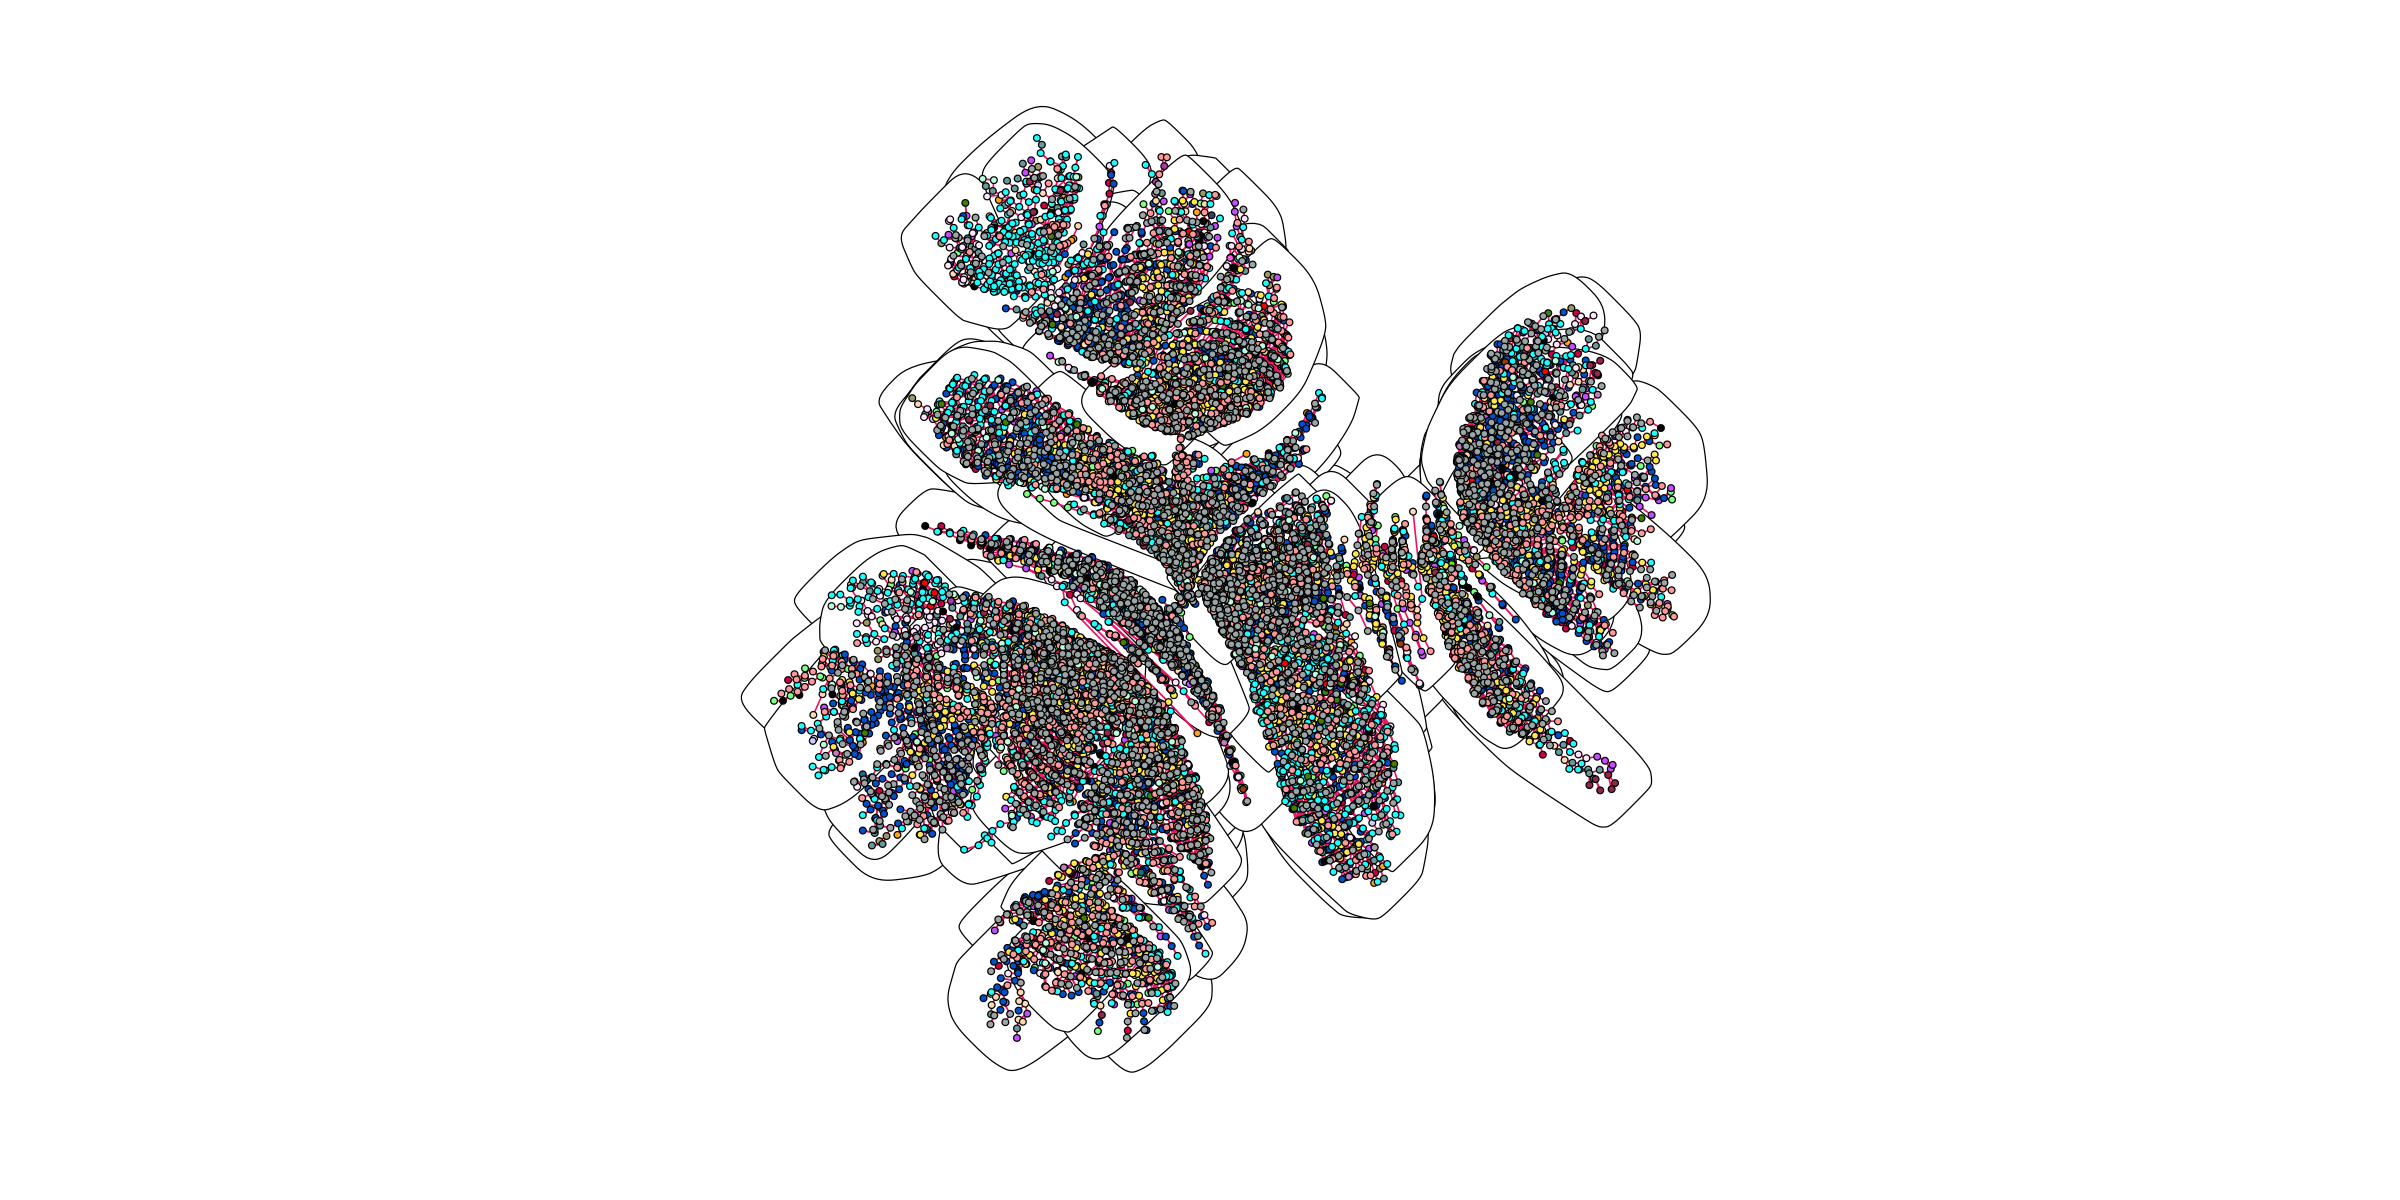

In [85]:
plot(cb, main, col=V(main)$color, mark.border="black", mark.col=c("white"), edge.color=(E(main)$color),
    vertex.size=1.5, vertex.label=NA, edge.width=edgeweights, edge.curved=FALSE, vertex.shape="myimg",vertex.frame.width=1,vertex.frame.color="#000000",layout=layout_with_kk)


In [86]:
grps <- split(V(main),cb$membership)
#grp <- unlist(subset(grps,mapply(`%in%`,5,grps)))
#df <- subset(get.data.frame(g),from %in% grp & to %in% grp)
grps

$`1`
+ 199/19318 vertices, named, from 1dde4e4:
  [1]  Apicomplexa_ko:K02932       Cercozoa_ko:K01487        
  [3]  Chlorophyta_ko:K00799       Chlorophyta_ko:K00855     
  [5]  Chlorophyta_ko:K00963       Chlorophyta_ko:K01749     
  [7]  Chlorophyta_ko:K09022       Chlorophyta_ko:K14849     
  [9]  Choanoflagellida_ko:K09584  Ciliophora_ko:K01049      
 [11]  Ciliophora_ko:K01050        Ciliophora_ko:K02866      
 [13]  Ciliophora_ko:K10413        Ciliophora_ko:K15528      
 [15]  Cryptophyta_ko:K08486       Dinophyta_ko:K00066       
 [17]  Dinophyta_ko:K00949         Dinophyta_ko:K01071       
 [19]  Dinophyta_ko:K01087         Dinophyta_ko:K02367       
+ ... omitted several vertices

$`2`
+ 195/19318 vertices, named, from 1dde4e4:
  [1]  Apicomplexa_ko:K11251       Cercozoa_ko:K08245        
  [3]  Chlorophyta_ko:K04127       Chlorophyta_ko:K06128     
  [5]  Chlorophyta_ko:K06238       Chlorophyta_ko:K06999     
  [7]  Chlorophyta_ko:K10739       Chlorophyta_ko:K14006     
  [9

In [87]:
main.nodes<-mst.nodes

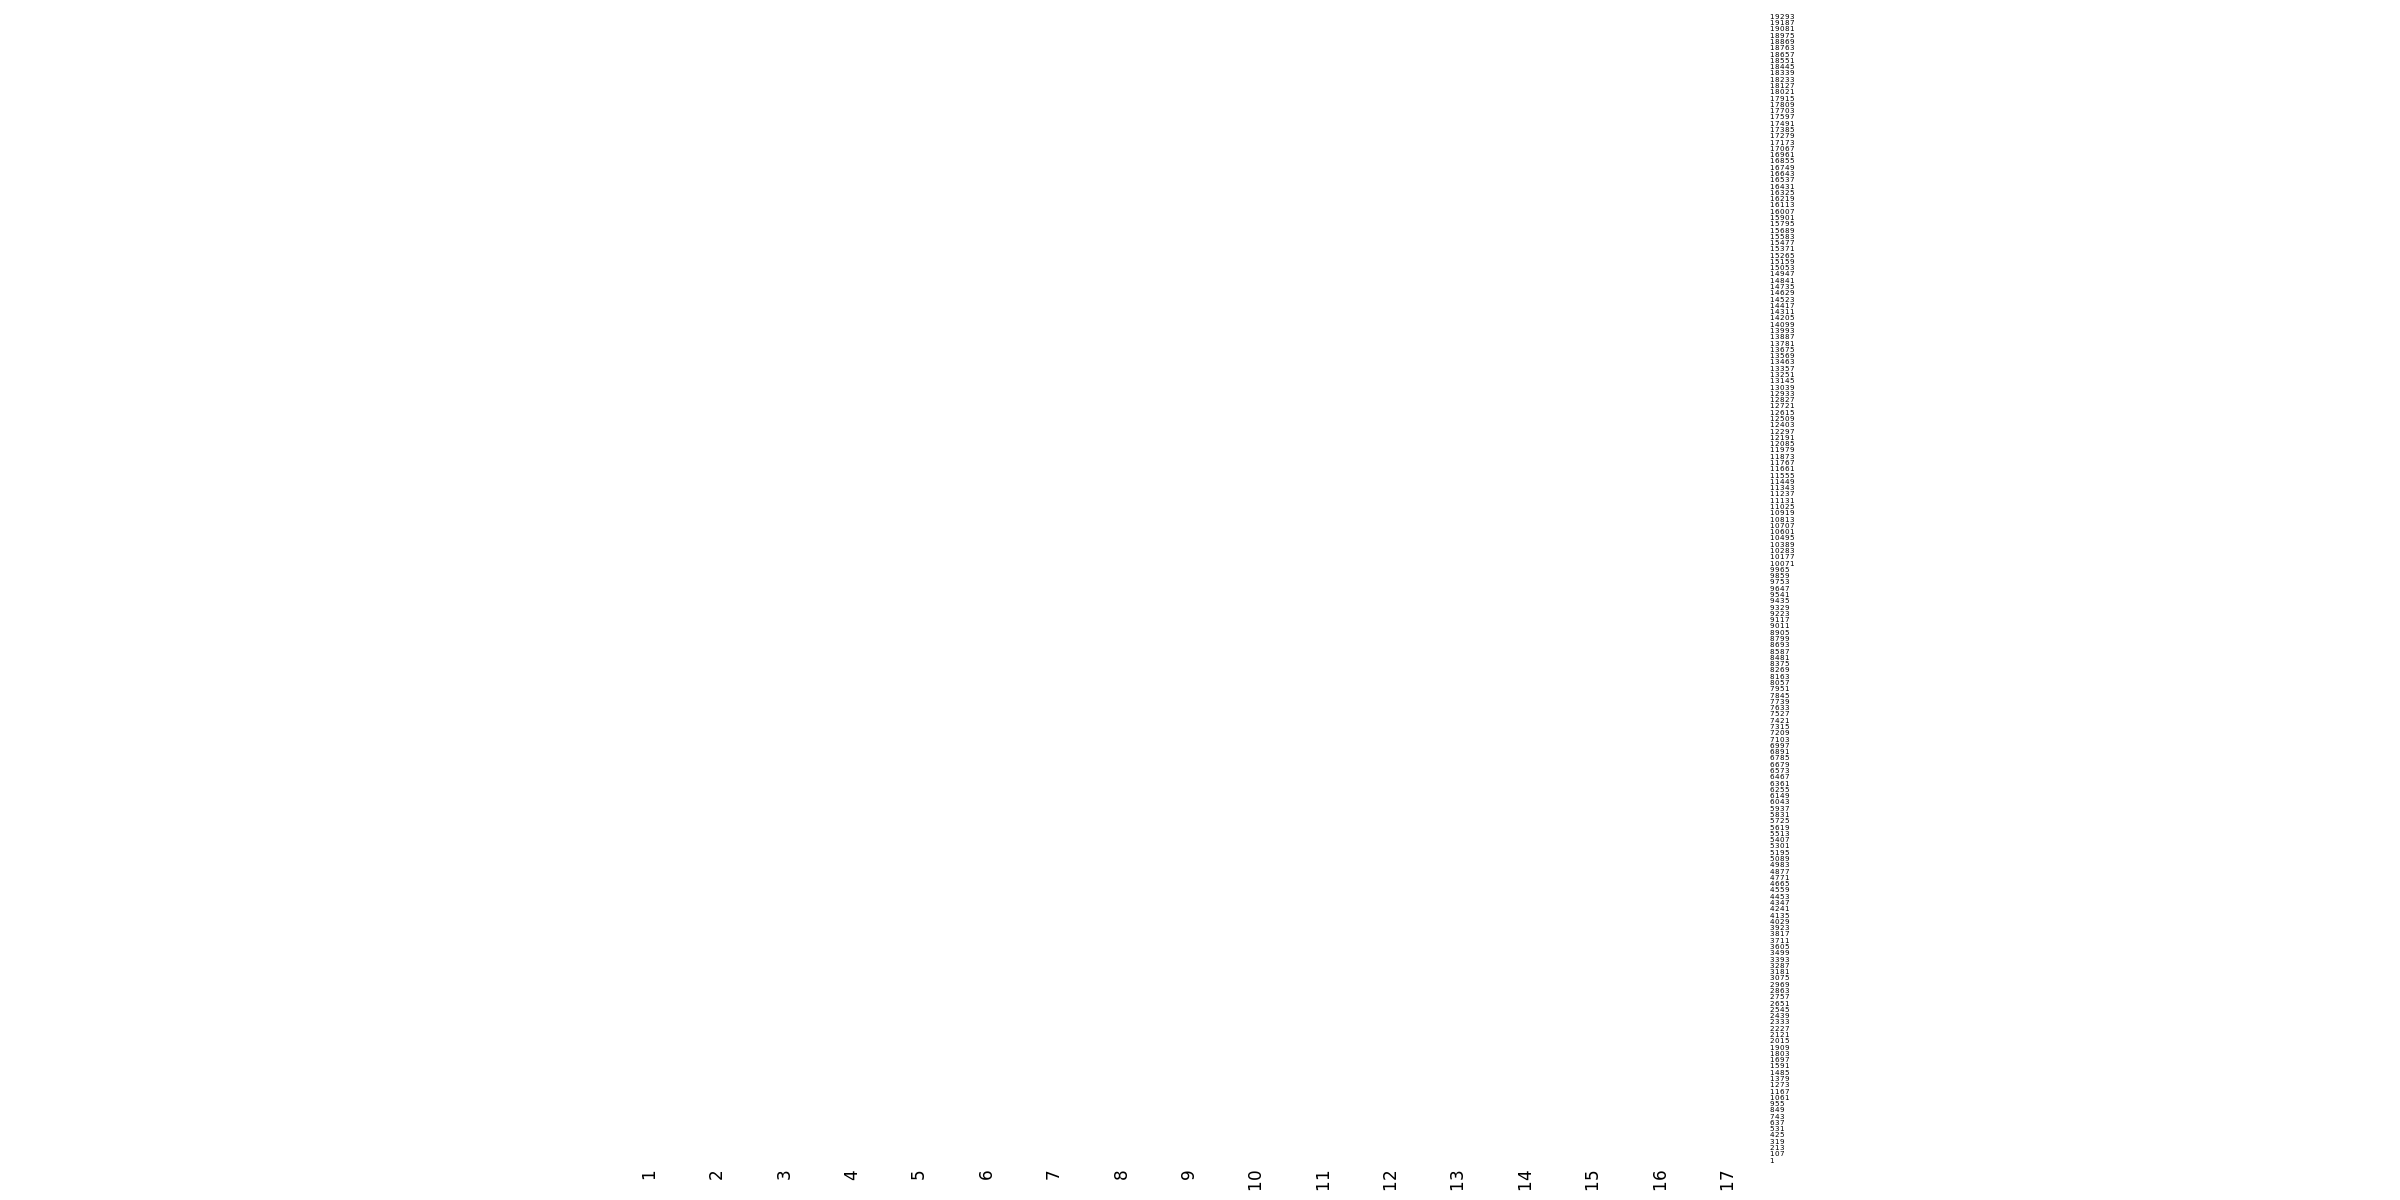

In [88]:
netm <- get.adjacency(main, attr="weight", sparse=F)

colnames(netm) <- V(main)$def

rownames(netm) <- V(main)$def



palf <- colorRampPalette(c("white", "black")) 

heatmap(netm[,17:1], Rowv = NA, Colv = NA, col = palf(100), 

        scale="none", margins=c(2,2) )

In [89]:
edge_density(main, loops=F)

[1] 0.0001035304

In [90]:
ecount(main)/(vcount(main)*(vcount(main)-1))

[1] 5.176519e-05

In [91]:
reciprocity(main) #always 1 for an undirected graph

[1] 1

In [92]:
transitivity(main, type="global")  # net is treated as an undirected network

#transitivity(as.undirected(main, mode="collapse")) # same as above

#transitivity(main, type="local")

#triad_census(main) # for directed networks 

[1] 0

In [93]:
diameter(main, directed=F, weights=NA)

[1] 101

[1] 0.000000e+00 4.848328e-01 2.690237e-01 1.272388e-01 5.989233e-02
 [6] 3.038617e-02 1.309659e-02 7.971840e-03 3.209442e-03 2.329434e-03
[11] 1.087069e-03 4.658867e-04 0.000000e+00 1.552956e-04 1.035304e-04
[16] 1.035304e-04 5.176519e-05 0.000000e+00 5.176519e-05

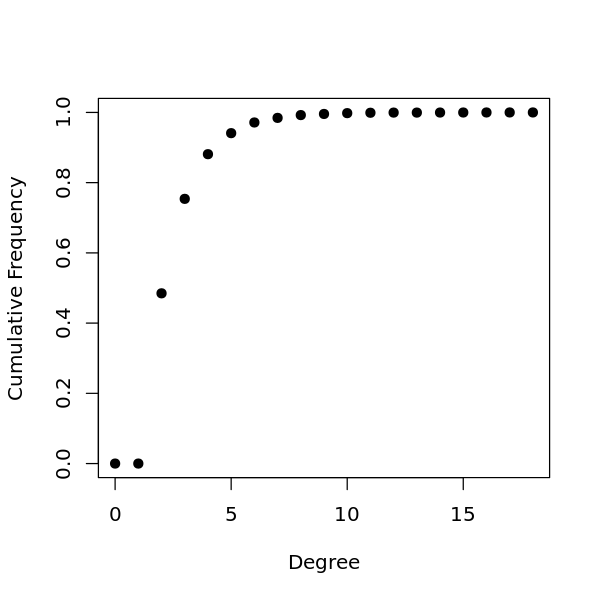

In [94]:
#From https://rstudio-pubs-static.s3.amazonaws.com/337696_c6b008e0766e46bebf1401bea67f7b10.html#degree-distribution
options(repr.plot.width = 5, repr.plot.height = 5)

deg <- degree(main, mode="all")
degree_distribution(main)

deg.dist <- degree_distribution(main, cumulative=T, mode="all")

plot( x=0:max(deg), y=1-deg.dist, pch=19, cex=1, col="black", 

      xlab="Degree", ylab="Cumulative Frequency")

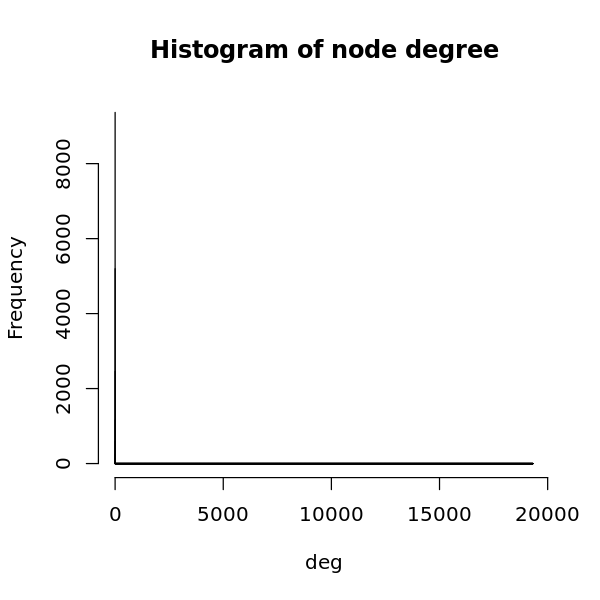

In [95]:
hist(deg, breaks=1:vcount(main)-1, main="Histogram of node degree")

In [96]:
closeness <- closeness(main)
degree <- degree(main)
betweenness <- betweenness(main)
eig <- evcent(main)$vector

centrality <- data.frame(row.names   = V(main)$name,
                         degree      = degree,
                         closeness   = closeness,
                         betweenness = betweenness,
                         eigenvector = eig)

centrality <- centrality[order(row.names(centrality)),]

max(centrality$degree)

[1] 18

In [97]:
degreemax<-17
sub<-centrality[centrality$degree %in% degreemax,]
sub #molecular chaperone HtpG - Dino

degree closeness betweenness eigenvector

In [98]:
class(cb)

[1] "communities"

In [99]:
length(cb)

[1] 144

In [100]:
membership(cb)

      Alveolata_X_ko:K01802       Alveolata_X_ko:K02955 
                         83                          55 
      Alveolata_X_ko:K04131       Alveolata_X_ko:K04739 
                         82                         104 
      Alveolata_X_ko:K04958       Alveolata_X_ko:K04960 
                         82                          82 
      Alveolata_X_ko:K04961       Alveolata_X_ko:K04962 
                         82                          82 
      Alveolata_X_ko:K04963       Alveolata_X_ko:K11252 
                         82                          99 
      Alveolata_X_ko:K11279       Alveolata_X_ko:K11883 
                        135                          87 
      Alveolata_X_ko:K12734       Alveolata_X_ko:K22190 
                         83                          83 
      Apicomplexa_ko:K00412       Apicomplexa_ko:K00948 
                         63                          32 
      Apicomplexa_ko:K01887       Apicomplexa_ko:K02148 
                         54    

In [101]:
modularity(cb)

[1] 0.9852686

In [102]:
com <- cbind(V(main),cb$membership) #V(g) gets the number of vertices
com <- cbind(V(main)$name,cb$membership) #To get names if your vertices are labeled

In [103]:
df<-as.data.frame(com)
colnames(df)<-c('name','membership')
head(df)

name                   membership
1  Alveolata_X_ko:K01802 83        
2  Alveolata_X_ko:K02955 55        
3  Alveolata_X_ko:K04131 82        
4  Alveolata_X_ko:K04739 104       
5  Alveolata_X_ko:K04958 82        
6  Alveolata_X_ko:K04960 82

In [104]:
merge<-merge(df, main.nodes,by='name')

In [105]:
library(ggplot2)

In [106]:
merge3<-merge(df, main.nodes,by='name')

In [178]:
colnames(key)<-c('ko','def')
merge4<-merge(merge3, key, by='ko',all=T)
write.csv(merge4,'transcripts_network_table.csv')

In [107]:
ye <- merge %>% count(membership, ko)
head(ye)
library(caroline)
sum<-groupBy(ye, by='membership',clmn=c('n'),aggregation='sum')
sum$membership<-rownames(sum)
colnames(sum)<-c('sum','membership')
count<-merge(sum, ye, by='membership')
count$ratio<-count$n/count$sum
head(count)

count$membership <- factor(count$membership, levels = (1:101), ordered=TRUE) 
levels(count$membership)

membership ko        n
1 1          ko:K00066 1
2 1          ko:K00227 1
3 1          ko:K00254 1
4 1          ko:K00418 1
5 1          ko:K00480 1
6 1          ko:K00655 1

membership sum ko        n ratio      
1 1          199 ko:K00066 1 0.005025126
2 1          199 ko:K00227 1 0.005025126
3 1          199 ko:K00254 1 0.005025126
4 1          199 ko:K00418 1 0.005025126
5 1          199 ko:K00480 1 0.005025126
6 1          199 ko:K00655 1 0.005025126

[1] "1"   "2"   "3"   "4"   "5"   "6"   "7"   "8"   "9"   "10"  "11"  "12" 
 [13] "13"  "14"  "15"  "16"  "17"  "18"  "19"  "20"  "21"  "22"  "23"  "24" 
 [25] "25"  "26"  "27"  "28"  "29"  "30"  "31"  "32"  "33"  "34"  "35"  "36" 
 [37] "37"  "38"  "39"  "40"  "41"  "42"  "43"  "44"  "45"  "46"  "47"  "48" 
 [49] "49"  "50"  "51"  "52"  "53"  "54"  "55"  "56"  "57"  "58"  "59"  "60" 
 [61] "61"  "62"  "63"  "64"  "65"  "66"  "67"  "68"  "69"  "70"  "71"  "72" 
 [73] "73"  "74"  "75"  "76"  "77"  "78"  "79"  "80"  "81"  "82"  "83"  "84" 
 [85] "85"  "86"  "87"  "88"  "89"  "90"  "91"  "92"  "93"  "94"  "95"  "96" 
 [97] "97"  "98"  "99"  "100" "101"

Warning message:
“`fun.y` is deprecated. Use `fun` instead.”


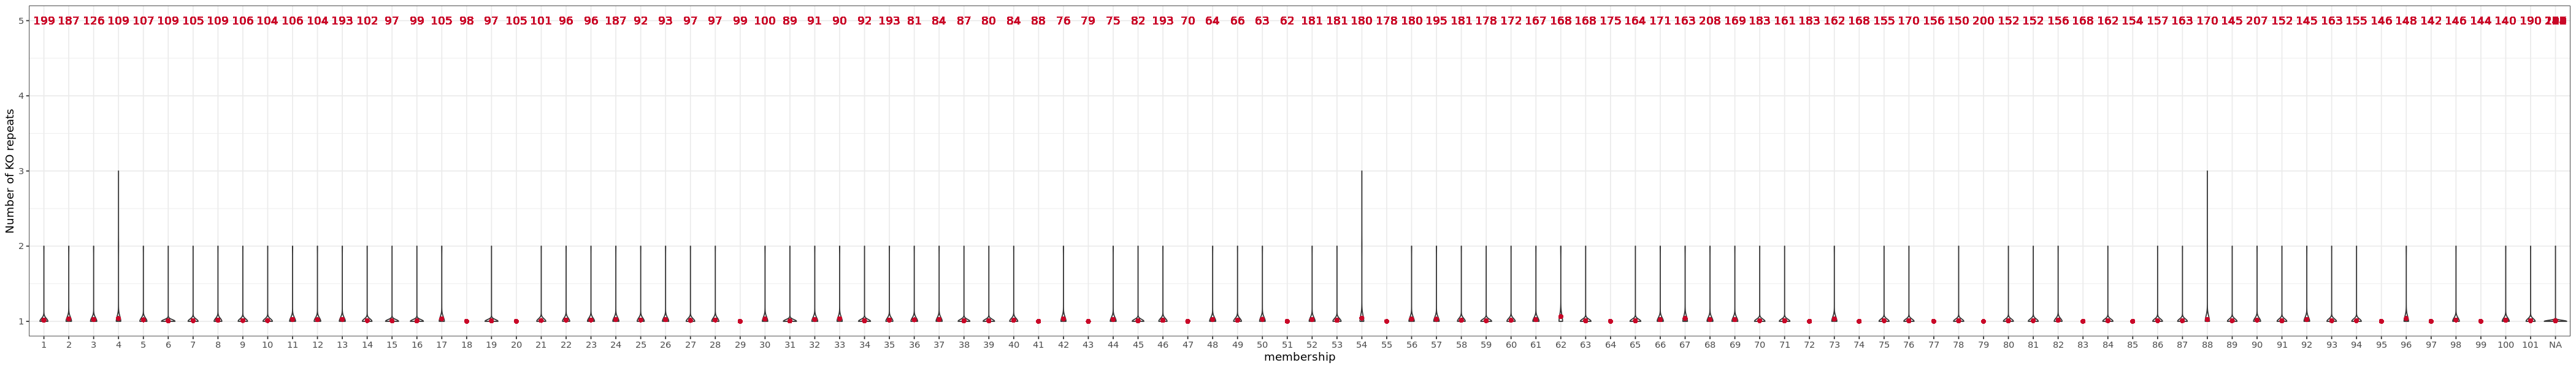

In [108]:
options(repr.plot.width = 35, repr.plot.height = 5)
ggplot(count, aes(x=membership, y=n)) + 
  geom_violin() + theme_bw() + ylab("Number of KO repeats") + geom_text(aes(label = sum, x = membership, y = 5), data = count, color = '#c90828') + stat_summary(fun.y=mean, geom="point", shape=16, size=2,color = '#c90828')

In [174]:
netm <- get.adjacency(main, attr="weight", sparse=F)
#colnames(netm) <- V(main)$membership
#rownames(netm) <- V(main)$membership
palf <- colorRampPalette(c("gold", "dark orange"))
#heatmap(netm, Rowv = NA, Colv = NA, col = palf(100),
#scale="none", margins=c(10,10) )

In [111]:
library(dplyr)

In [112]:
cb

IGRAPH clustering fast greedy, groups: 144, mod: 0.99
+ groups:
  $`1`
    [1] " Apicomplexa_ko:K02932"      " Cercozoa_ko:K01487"        
    [3] " Chlorophyta_ko:K00799"      " Chlorophyta_ko:K00855"     
    [5] " Chlorophyta_ko:K00963"      " Chlorophyta_ko:K01749"     
    [7] " Chlorophyta_ko:K09022"      " Chlorophyta_ko:K14849"     
    [9] " Choanoflagellida_ko:K09584" " Ciliophora_ko:K01049"      
   [11] " Ciliophora_ko:K01050"       " Ciliophora_ko:K02866"      
   [13] " Ciliophora_ko:K10413"       " Ciliophora_ko:K15528"      
   [15] " Cryptophyta_ko:K08486"      " Dinophyta_ko:K00066"       
   [17] " Dinophyta_ko:K00949"        " Dinophyta_ko:K01071"       
  + ... omitted several groups/vertices

In [113]:
taxa <- merge %>% count(membership, taxa) #count each time a taxon appears in a membership cluster

In [114]:
taxa$membership <- factor(taxa$membership, levels = (1:144), ordered=TRUE)

In [115]:
levels(taxa$membership)

[1] "1"   "2"   "3"   "4"   "5"   "6"   "7"   "8"   "9"   "10"  "11"  "12" 
 [13] "13"  "14"  "15"  "16"  "17"  "18"  "19"  "20"  "21"  "22"  "23"  "24" 
 [25] "25"  "26"  "27"  "28"  "29"  "30"  "31"  "32"  "33"  "34"  "35"  "36" 
 [37] "37"  "38"  "39"  "40"  "41"  "42"  "43"  "44"  "45"  "46"  "47"  "48" 
 [49] "49"  "50"  "51"  "52"  "53"  "54"  "55"  "56"  "57"  "58"  "59"  "60" 
 [61] "61"  "62"  "63"  "64"  "65"  "66"  "67"  "68"  "69"  "70"  "71"  "72" 
 [73] "73"  "74"  "75"  "76"  "77"  "78"  "79"  "80"  "81"  "82"  "83"  "84" 
 [85] "85"  "86"  "87"  "88"  "89"  "90"  "91"  "92"  "93"  "94"  "95"  "96" 
 [97] "97"  "98"  "99"  "100" "101" "102" "103" "104" "105" "106" "107" "108"
[109] "109" "110" "111" "112" "113" "114" "115" "116" "117" "118" "119" "120"
[121] "121" "122" "123" "124" "125" "126" "127" "128" "129" "130" "131" "132"
[133] "133" "134" "135" "136" "137" "138" "139" "140" "141" "142" "143" "144"

In [116]:
library(ggplot2)

In [117]:
cols <- c(' Alveolata'='#FFFFFE',' Apicomplexa'='#CCCCFF', ' Apusomonadida' = '#2e436b', ' Cercozoa'="#999966", ' Chlorophyta'="#80FF80", ' Choanoflagellida'="#FFA319", ' Chromerida' = '#47d1d1',' Ciliophora'="#C44DFF",' Conosa'="#E6E600",' Cryptophyta'="#CC0044",' Dinophyta'="#0052CC",' Discoba'="#FFD9B3",' Evosea'='#fcf1f0',' Filasterea' = '#c98f22',' Foraminifera'="#669999", ' Fungi'="#FFE6FF",' Glaucocystophyta'="#993D00",' Hacrobia' = '#73e600',' Haptophyta'="#FFE74A",' Icthyosporea' = '#40057a',' Lobosa'="#000000", ' Metamonada' = '#ac39ac',' Metazoa' = '#1affff', ' Oomycota' = '#147087',' Perkinsea'="#408000", ' Picobiliphyta' = '#bb80bb',' Radiolaria' = '#942649',' Rhodophyta'="#FF0000",' Rotosphaerida' = '#bfd119',' Stramenopiles' = '#ff9999',' Streptophyta' = "#bbffdd", ' Synurophyceae' = '#ff59dd','NA'="#9ca5a6")


#cols <- c('#FFFFFE', '#CCCCFF', '#2e436b', "#999966", "#80FF80", "#FFA319", '#47d1d1',"#C44DFF","#E6E600","#CC0044","#0052CC","#FFD9B3",'#fcf1f0','#c98f22',"#669999", "#FFE6FF","#993D00",'#73e600',"#FFE74A",'#40057a',"#000000", '#ac39ac','#1affff','#147087',"#408000", '#bb80bb','#942649',"#FF0000",'#bfd119','#ff9999',"#bbffdd", '#ff59dd',"#9ca5a6")

In [118]:
options(repr.plot.width = 40, repr.plot.height = 7)

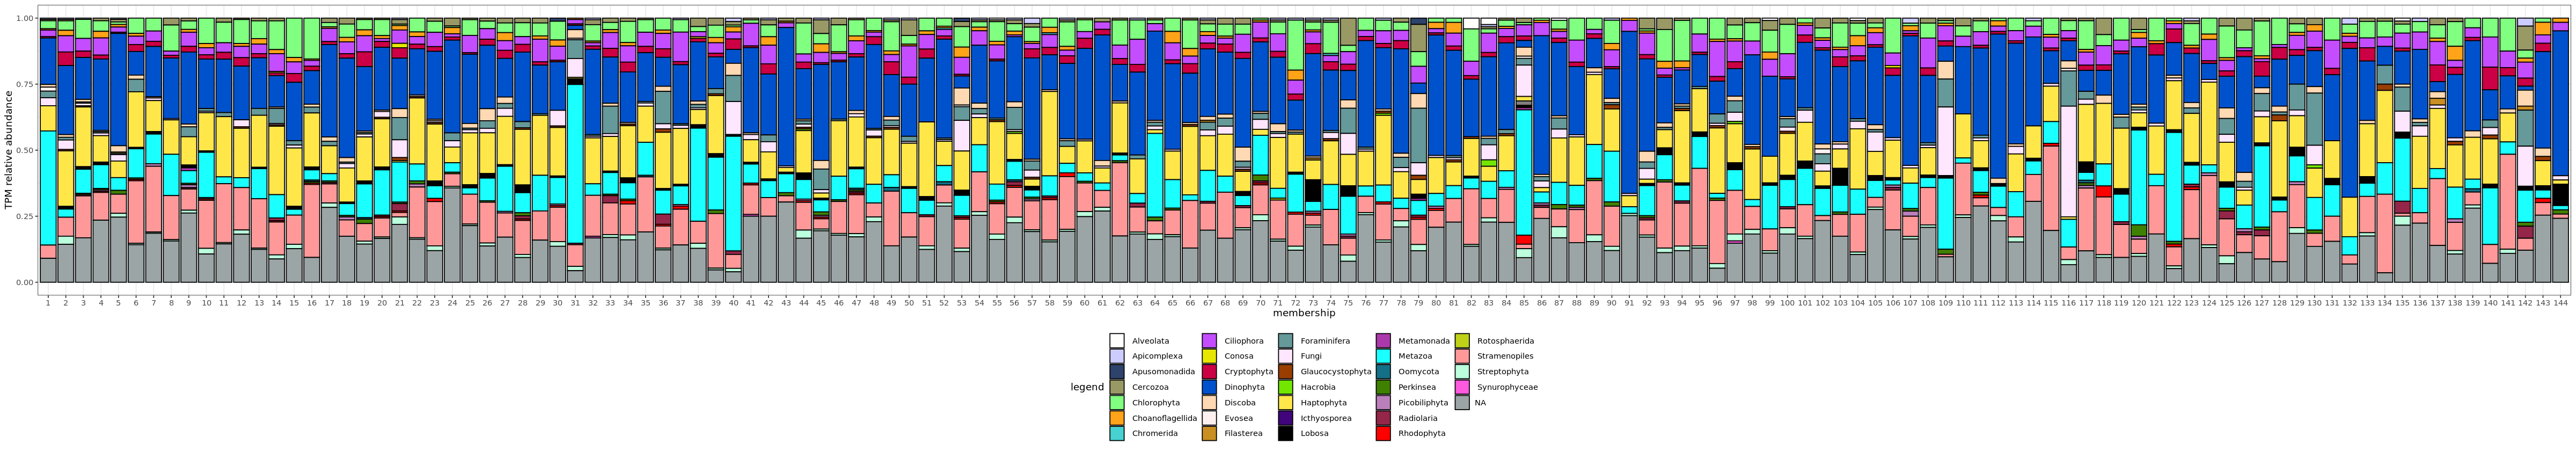

In [119]:
ggplot(taxa, aes(fill=taxa, y=n, x=membership)) + 
    geom_bar(position="fill", stat="identity",colour="black") + theme_bw() + ylab("TPM relative abundance") + theme(legend.position = "bottom") + scale_fill_manual("legend",values=cols)

In [120]:
ko<-main.nodes$ko

In [121]:
ko2<-unique(ko)

In [123]:
ko2brite<-read.csv('ko2brite.csv',header=TRUE, stringsAsFactors=FALSE, fileEncoding="latin1") #"Enzyme" category not included - too broad

In [124]:
colnames(ko2brite)<-c('BRITE','ko','x','x1','x2')
merge2<-merge(ko2brite, merge, by='ko',all=T) #If KO has two BRITE categories, each BRITE gets 1 KO count
test1<-merge2[!is.na(merge2$name), ] #Remove KO/BRITE rows without matches to dataset
merge2<-test1

In [125]:
func <- merge2 %>% count(membership, BRITE) #count each time a BRITE category appears in a membership cluster

In [126]:
options(repr.plot.width = 30, repr.plot.height = 7.5)

In [127]:
kegg<-c('#FA0404','#FB5F5F','#FB9F9F','#BD4646','#F2670D','#D67637','#B85A1C','#984610','#F6BA0E','#DBB340','#AFA619','#E6DA1E','#FBEC06','#CEFB06','#BFE125','#3CFA04','#4EC62A','#37D782','#1DB062','#2DF7BD','#16B98A','#16E6E3','#19BBB9','#19A0BB','#0B6D81','#0c1a63','#1F8ACB','#0A6FF7','#043BF7','#2E08C8','#5643A5','#9084C4','#9D24EB','#B96BEB','#F028E3','#D87AD2','#F93875','#f296b9','#f0dfe7','#FFFFFE','#000000','#000000','#000000')

In [128]:
KO<-c('ko01007 Amino acid related enzymes','ko01009 Protein phosphatases and associated proteins','ko01002 Peptidases and inhibitors','ko01001 Protein kinases','ko04031 GTP-binding proteins','ko03012 Translation factors','ko03011 Ribosome','ko03009 Ribosome biogenesis','ko03019 Messenger RNA biogenesis','ko03036 Chromosome and associated proteins','ko03021 Transcription machinery','ko03016 Transfer RNA biogenesisæ','ko03400 DNA repair and recombination proteins','ko03032 DNA replication proteins','ko03000 Transcription factors','ko00194 Photosynthesis proteinsæ','ko03029 Mitochondrial biogenesis','ko04040 Ion channels','ko02000 Transporters','ko04090 CD molecules','ko04131 Membrane trafficking','ko02044 Secretion system','ko04030 G protein-coupled receptors','ko01003 Glycosyltransferases','ko00536 Glycosaminoglycan binding proteins','ko01004 Lipid biosynthesis proteins','ko04091 Lectins','ko00537 Glycosylphosphatidylinositol (GPI)-anchored proteins','ko01008 Polyketide biosynthesis proteins','ko03051 Proteasome','ko04121 Ubiquitin system','ko03041 Spliceosome','ko03110 Chaperones and folding catalysts','ko04147 Exosome','ko04515 Cell adhesion molecules','ko02035 Bacterial motility proteinsæ','ko04054 Pattern recognition receptors','ko00199 Cytochrome P450','ko04990 Domain-containing proteins not elsewhere classified','ko04812 Cytoskeleton proteins','Other')

In [129]:
func$BRITE <- factor(func$BRITE, levels = KO, ordered=TRUE)

In [130]:
func$membership <- factor(func$membership, levels = (1:152), ordered=TRUE)

In [131]:
library(ggplot2)

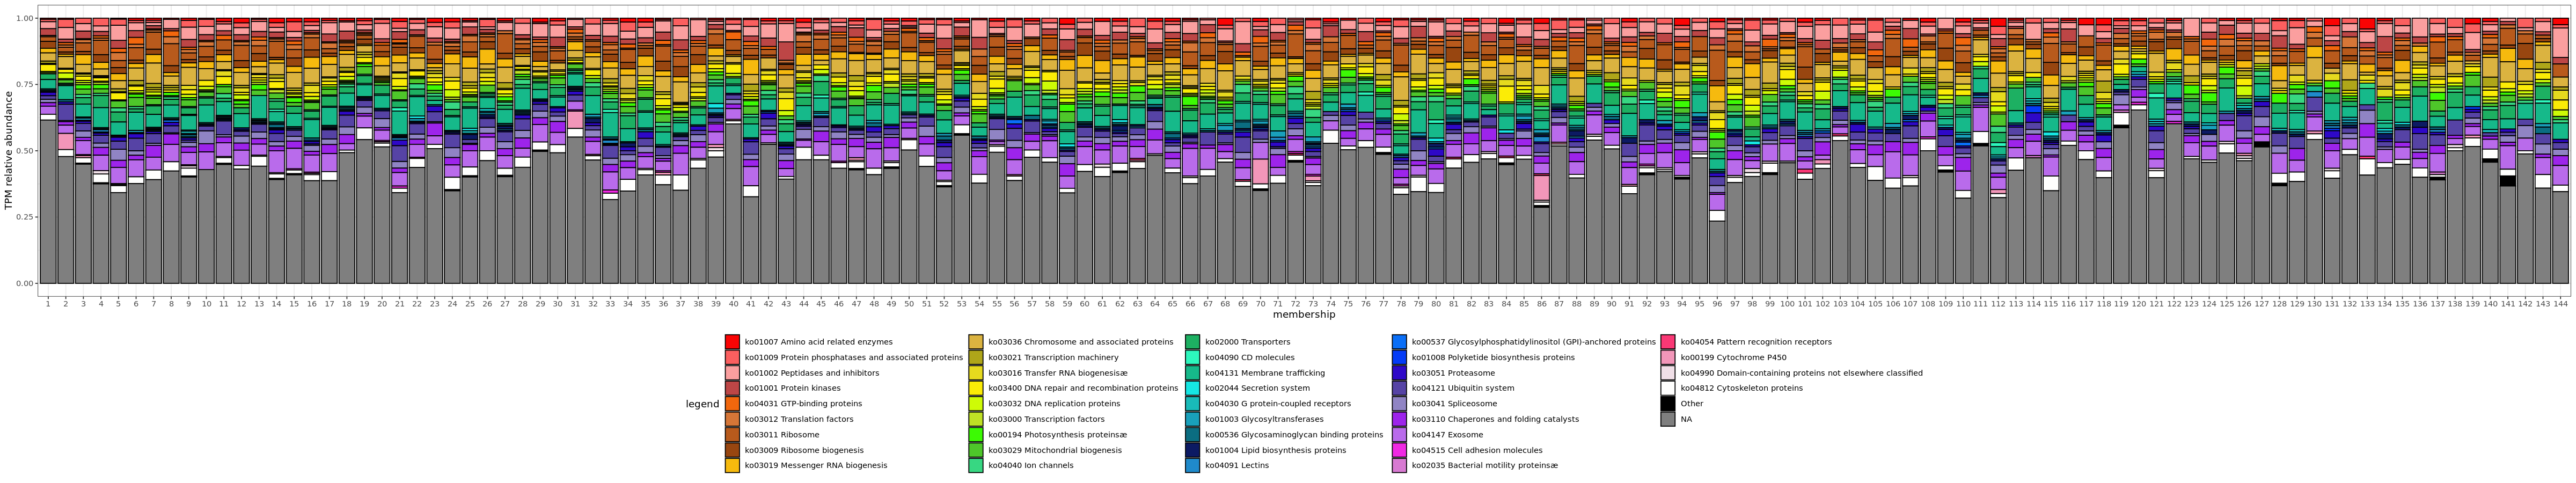

In [132]:
options(repr.plot.width = 40, repr.plot.height = 7.5)
ggplot(func, aes(fill=BRITE, y=n, x=membership)) + 
    geom_bar(position="fill", stat="identity", colour="black") + theme_bw() + ylab("TPM relative abundance") + theme(legend.position = "bottom") + scale_fill_manual("legend",values=kegg)

In [135]:
library(tmod)

For tmod user guide, type `vignette("tmod")`



In [136]:
membership<-as.data.frame(com)

In [137]:
colnames(membership)<-c('gene_id','geneset_id')

In [138]:
res <- makeTmodFromDataFrame(membership, feature_col="gene_id", module_col="geneset_id")

unlisting m2g

making Tmod



In [139]:
eig<-eigengene(d, rownames(d), res)

In [140]:
cor_eig<-cor(eig)

In [141]:
library(ggcorrplot)

In [142]:
p.mat <- ggcorrplot::cor_pmat(cor_eig)

In [143]:
head(p.mat)

1_30_0.2     1_115_3      1_200        1_400        1_800       
1_30_0.2 0.000000e+00 8.116527e-21 7.767581e-03 3.108927e-09 8.249989e-05
1_115_3  8.116527e-21 0.000000e+00 6.756518e-05 1.807729e-04 6.684995e-02
1_200    7.767581e-03 6.756518e-05 0.000000e+00 5.176959e-01 1.984135e-02
1_400    3.108927e-09 1.807729e-04 5.176959e-01 0.000000e+00 5.176923e-19
1_800    8.249989e-05 6.684995e-02 1.984135e-02 5.176923e-19 0.000000e+00
2_20     1.547747e-19 7.485708e-35 1.454521e-05 8.600986e-04 1.531175e-01
         2_20         2_120        2_200        2_400        2_800        ⋯
1_30_0.2 1.547747e-19 2.150245e-07 5.733589e-02 5.744243e-25 5.204959e-20 ⋯
1_115_3  7.485708e-35 2.268848e-03 7.762961e-05 1.041395e-20 8.569143e-19 ⋯
1_200    1.454521e-05 1.922324e-01 3.238153e-10 3.162131e-04 6.315492e-04 ⋯
1_400    8.600986e-04 9.106053e-23 2.090160e-02 3.182795e-07 3.696357e-06 ⋯
1_800    1.531175e-01 1.694316e-24 6.377564e-06 1.703728e-03 5.151914e-03 ⋯
2_20     0.000000e+00 9.075196e-03 7.956445e-06 4.753280e-19 4.018063e-17 ⋯
         3_600        3_700        3_1000       5_20         5_200       
1_30_0.2 2.864272e-12 4.367895e-33 1.245077e-13 2.262146e-27 2.172680e-03
1_115_3  8.955649e-25 7.228914e-23 8.143966e-07 1.436530e-31 1.494011e-01
1_200    2.741957e-07 1.180711e-02 8.286560e-01 3.238003e-04 9.948289e-03
1_400    3.698998e-02 6.184157e-09 3.609727e-23 8.608093e-06 9.584114e-10
1_800    8.536776e-01 1.312260e-04 3.748608e-16 1.215109e-02 1.437966e-14
2_20     9.574844e-28 1.874787e-19 8.125099e-06 2.123395e-32 3.393581e-01
         5_400        5_880        6_20         6_110        6_200       
1_30_0.2 2.316916e-07 4.434764e-24 3.678723e-25 1.917017e-06 7.332877e-19
1_115_3  3.434570e-03 1.448349e-12 9.635917e-35 7.024931e-03 7.905483e-11
1_200    3.020411e-01 2.413044e-01 9.736714e-05 1.098887e-01 7.261149e-02
1_400    1.776223e-23 2.073171e-15 4.062342e-05 3.859208e-19 1.620621e-10
1_800    6.438935e-24 6.787860e-09 3.035498e-02 1.244621e-24 1.175364e-06
2_20     1.004958e-02 6.087909e-11 1.798978e-38 2.473814e-02 3.021247e-10

In [144]:
options(repr.plot.width = 10, repr.plot.height = 9)

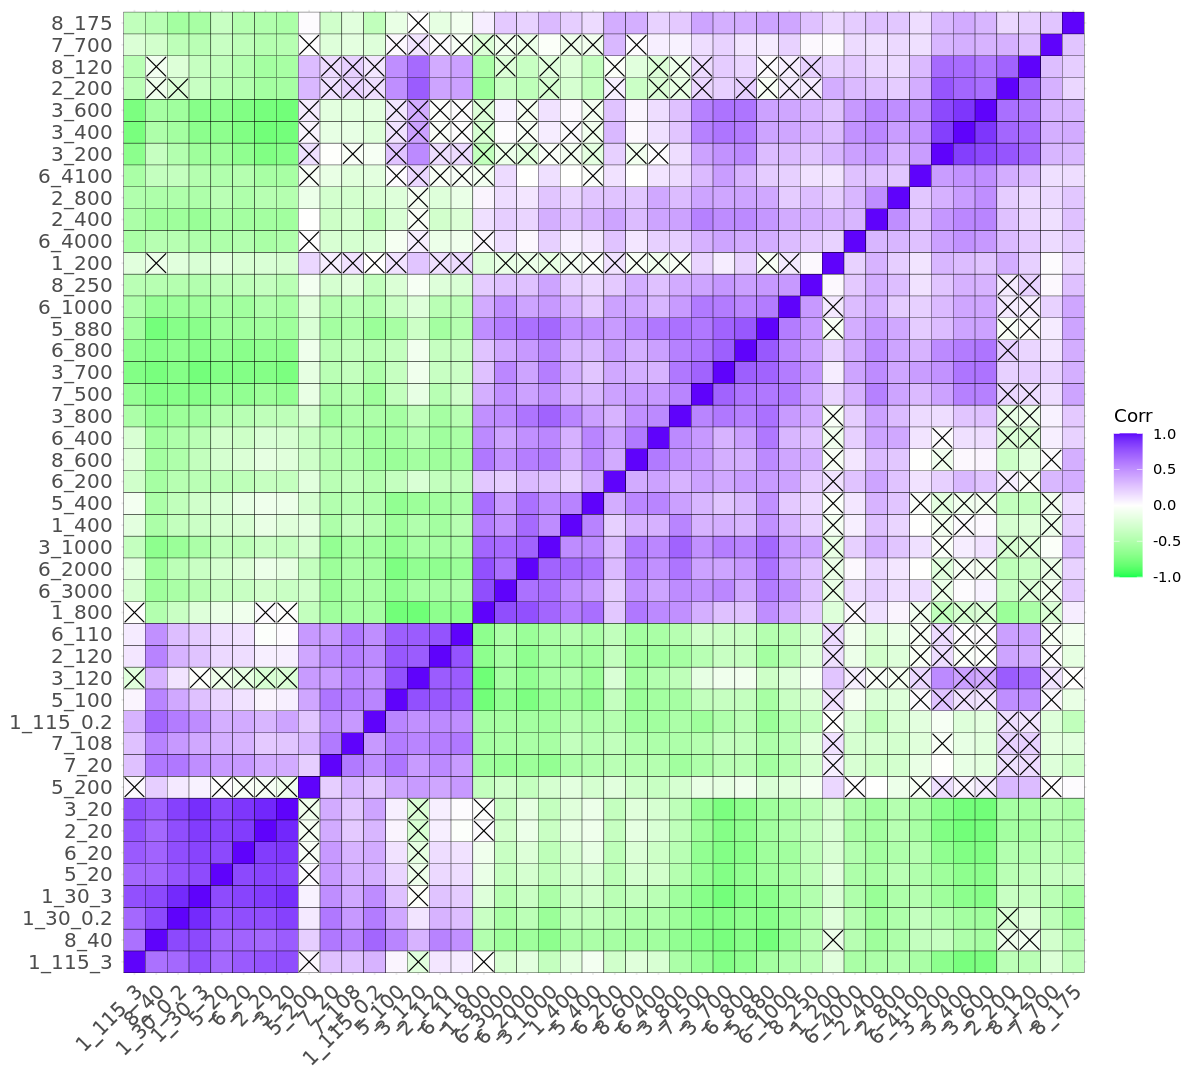

In [145]:
ggcorrplot(cor_eig,hc.order=TRUE,colors = c("#0FFF50", "#FFFFFE", "#5F03FB"),outline="black",p.mat=p.mat, sig.level=0.05)

In [146]:
t_eig<-t(eig)
t_eig<-as.data.frame(t_eig)

In [147]:
t_eig$ID<-rownames(t_eig)
t_eig<-as.data.frame(t_eig)

In [148]:
cors<-read.csv('correlations.csv')

In [149]:
merge<-merge(t_eig, cors, by="ID")

In [150]:
head(merge[1:5,145:156])

31        Station depth Fe        Zn        Cd          Ni       Cu       
1 -2.120508 1       115   0.1856653 0.9711324 0.007249821 2.003143 0.9089018
2  1.402742 1       115   0.1856653 0.9711324 0.007249821 2.003143 0.9089018
3 -1.931592 1       200   0.2293162 1.3929529 0.010309019 2.040288 0.9952482
4 -1.674885 1        30   0.5318190 0.6711650 0.003519851 1.958119 0.8880448
5 -1.422839 1        30   0.5318190 0.6711650 0.003519851 1.958119 0.8880448
  Mn        PO4  NO2.NO3 Si 
1 1.2980526 0.23 1.4     0.4
2 1.2980526 0.23 1.4     0.4
3 0.9434531 0.20 1.4     0.3
4 2.5443186 0.18 0.2     0.3
5 2.5443186 0.18 0.2     0.3

In [151]:
merge<-merge[,-146]

In [152]:
rownames(merge)<-merge$ID

In [153]:
merge<-merge[,-1]

In [154]:
library(ggcorrplot)

In [155]:
corr <- cor(merge)

In [156]:
options(repr.plot.width = 10, repr.plot.height = 10)

In [157]:
options(repr.plot.width = 20, repr.plot.height = 20)

In [158]:
cors<-cors[,-1]

In [159]:
cors<-cors[with(cors, order(ID)),] #sort by ID

In [160]:
 t_eig<-t_eig[with(t_eig, order(ID)),] #sort by ID

In [161]:
t_eig<-t_eig[(t_eig$ID %in% cors$ID),] #remove rows not shared in other df

In [162]:
cors<-cors[(cors$ID %in% t_eig$ID),] #remove rows not shared in other df

In [164]:
cors<-cors[,-2]

In [165]:
head(t_eig)

83        55        82        104       99        135       
1_115_0.2 -2.663567  2.496152  7.973365  2.651302 -3.318543 -3.4613911
1_115_3    6.199046  8.442529  5.639495  6.313484  8.157159  1.7262367
1_200     -4.869842 -3.746416 -2.563133 -1.575592 -3.664908 -2.0398359
1_30_0.2   4.251290 11.180793  8.438988  8.642472  5.304720 -0.6781463
1_30_3     6.117228 17.483848 13.171429 11.864980  8.611225  3.0408809
1_400     -1.640258 -1.664609 -2.573134 -3.602209 -1.180095  0.3497661
          87        63         32        54          ⋯ 139        112      
1_115_0.2 -1.655153 -0.5078744  9.840427  2.42653931 ⋯ -2.3308176 -3.669825
1_115_3    5.187950  6.5966387  9.404970  5.19637848 ⋯  7.0372018  6.411066
1_200     -3.251094 -1.8475426 -2.530615 -0.09330411 ⋯ -0.2659193 -2.157510
1_30_0.2   6.561745  7.8079469  9.442514  8.31181903 ⋯  6.2105786  4.019655
1_30_3     9.639320  9.9890957 13.427650  9.74547200 ⋯  6.3839072  7.760079
1_400      2.047020  0.9573987 -1.630998 -0.51023252 ⋯  0.4075370  1.234596
          81        70        80         143        91         144       
1_115_0.2  4.862390 -3.595146 -1.8726153  0.2532238 -2.5119591 -1.7059266
1_115_3    7.273497  8.950252 10.2805290  4.4414278  6.8358402  5.9074880
1_200     -3.408979 -4.908268 -0.8119045 -0.2547252 -2.3453740 -0.2791913
1_30_0.2   6.200984  3.989911  6.3188457  4.3884480  3.9813793  1.1086929
1_30_3    10.793349  9.995652 12.4182634  8.1329727  8.2176546  4.1535419
1_400      2.336541 12.771274  0.5483396 -2.7216545  0.6447338  2.1633089
          31        ID       
1_115_0.2 -2.120508 1_115_0.2
1_115_3    1.402742 1_115_3  
1_200     -1.931592 1_200    
1_30_0.2  -1.674885 1_30_0.2 
1_30_3    -1.422839 1_30_3   
1_400     -2.214941 1_400

In [166]:
t_eig<-t_eig[,-145]

In [167]:
colnames(t_eig)<-as.factor(colnames(t_eig))

In [168]:
library(psych)
correlation<-corr.test(x=t_eig,y=cors, method=c("spearman"))


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




In [169]:
p.mat <- correlation$p

In [170]:
options(repr.plot.width = 40, repr.plot.height = 7)

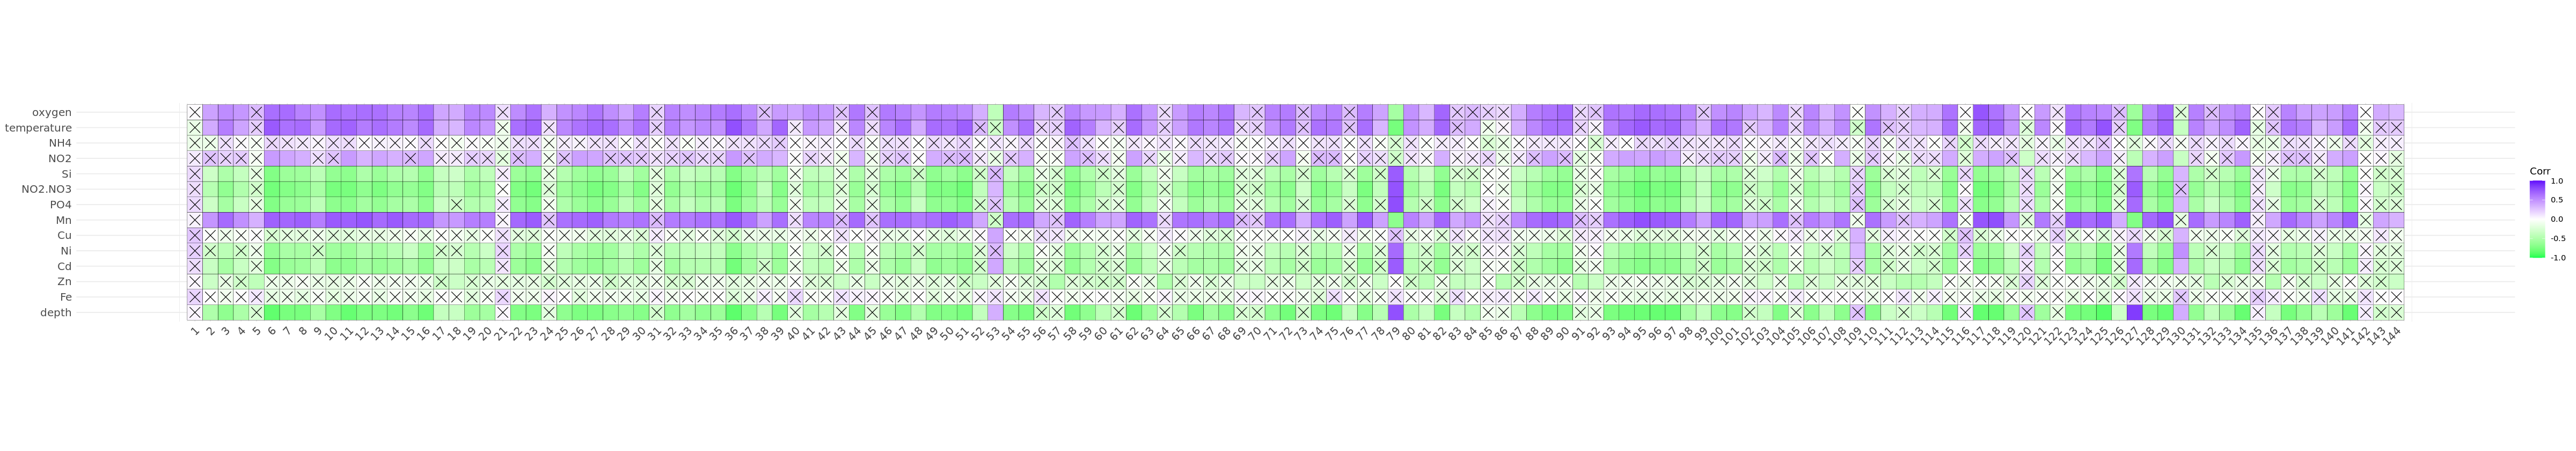

In [171]:
ggcorrplot(correlation$r,colors = c("#0FFF50", "#FFFFFE", "#5F03FB"),outline="black", p.mat = p.mat, sig.level=0.05) + ggplot2::scale_x_continuous(breaks = seq(1, 144, 1))

In [ ]:
main

In [ ]:
cb